In [27]:
!pip install pandas seaborn matplotlib scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import pandas as pd
df = pd.read_csv('preprocessed_data.csv')

df.head()

,Make,Model,Year,Price,Mileage,Body Type,Cylinders,Transmission,Fuel Type,Color,...,Body Type_Wagon,Make Encoded,Model Encoded,Color Encoded,Year zscore scaled,Mileage zscore scaled,Price zscore scaled,Cylinders zscore scaled,Car Age zscore scaled,Mileage Per Year zscore scaled
0,toyota,camry,2016,47819.0,156500,Sedan,4,Automatic Transmission,Gasoline,Black,...,0.0,111815.739082,59573.661538,295369.325024,0.263740,0.015991,-0.419182,-1.155725,-0.263740,-0.252931
1,kia,sorento,2013,61250.0,169543,SUV,4,Automatic Transmission,Gasoline,Grey,...,0.0,44691.069565,39255.111111,259363.792655,-0.254345,0.171863,-0.390664,-1.155725,0.254345,-0.331979
2,mini,cooper,2023,31861.0,221583,Soft Top Convertible,4,Automatic Transmission,Gasoline,Grey,...,0.0,75449.916667,72200.627907,259363.792655,1.472606,0.793774,-0.453067,-1.155725,-1.472606,2.011678
3,nissan,altima,2016,110322.0,69754,Sedan,4,Automatic Transmission,Gasoline,Red,...,0.0,95783.971892,46364.504505,276426.754331,0.263740,-1.020677,-0.286467,-1.155725,-0.263740,-0.486622
4,toyota,land-cruiser-76-series,2020,139994.0,71399,Pick Up Truck,4,Manual Transmission,Gasoline,White,...,0.0,111815.739082,137098.800000,190510.761848,0.954521,-1.001018,-0.223462,-1.155725,-0.954521,-0.328313


In [29]:
X = df.drop(columns=['Price', 'Year', 'Car Age', 'Mileage', 'Mileage Per Year', 'Cylinders', 'Log Price', 'Fuel Type', 'Make', 'Model', 'Body Type', 'Transmission', 'Color', 'Price zscore scaled', 'Mileage zscore scaled'])  
y = df['Price'] 

In [30]:
X

,Transmission Encoded,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_Gasoline,Fuel Type_Hybrid,Body Type_Coupe,Body Type_Crossover,Body Type_Hard Top Convertible,Body Type_Hatchback,Body Type_Other,...,Body Type_Utility Truck,Body Type_Van,Body Type_Wagon,Make Encoded,Model Encoded,Color Encoded,Year zscore scaled,Cylinders zscore scaled,Car Age zscore scaled,Mileage Per Year zscore scaled
0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,111815.739082,59573.661538,295369.325024,0.263740,-1.155725,-0.263740,-0.252931
1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,44691.069565,39255.111111,259363.792655,-0.254345,-1.155725,0.254345,-0.331979
2,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,75449.916667,72200.627907,259363.792655,1.472606,-1.155725,-1.472606,2.011678
3,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,95783.971892,46364.504505,276426.754331,0.263740,-1.155725,-0.263740,-0.486622
4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,111815.739082,137098.800000,190510.761848,0.954521,-1.155725,-0.954521,-0.328313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,249065.056604,224851.305556,190510.761848,0.609130,-0.113075,-0.609130,-0.408111
9996,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,190098.483627,58581.117647,276426.754331,1.299911,-1.155725,-1.299911,1.411804
9997,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,111815.739082,104034.322917,190510.761848,-0.081650,-0.113075,0.081650,-0.497047
9998,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,42722.228571,39484.200000,190510.761848,0.263740,-1.155725,-0.263740,0.102147


In [31]:
# split dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Linear Regression

from sklearn.linear_model import LinearRegression

# Initialize model
lr_model = LinearRegression()

# Train model
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)

In [35]:
# Evaluate Linear Regression Model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

# Linear Regression
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse =root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}")

Linear Regression - MAE: 102445.09118158213, MSE: 39631054027.52635, RMSE: 199075.49831038062, R²: 0.8488379010874164


R² value is 0.85, which suggests that the model explains about 85% of the variance in the target variable (used vehicle prices)

Since Mean Squared Error (MSE) is sensitive to large errors, therfore having large value like 39631054027.53 for MSE means that there are significant outliers in the selected features. So, we might have to analyze the selected feature further and handle those outliers to get better accuracy.

In [37]:
# Create a DataFrame with the predicted prices and true prices
results = pd.DataFrame({'Predicted Price': y_pred, 'Actual Price': y_test})

# Calculate the difference between the true prices and predicted prices and add a new column
results['Difference'] = results['Actual Price'] - results['Predicted Price']

print(results.head())

      Predicted Price  Actual Price    Difference
6252     2.065545e+05      294670.0  88115.503250
4684     8.155750e+04       21786.0 -59771.497239
1731     5.877105e+04       98031.0  39259.954488
4742     2.179395e+05      257844.0  39904.506879
4521     1.312245e+06     1220193.0 -92052.192922


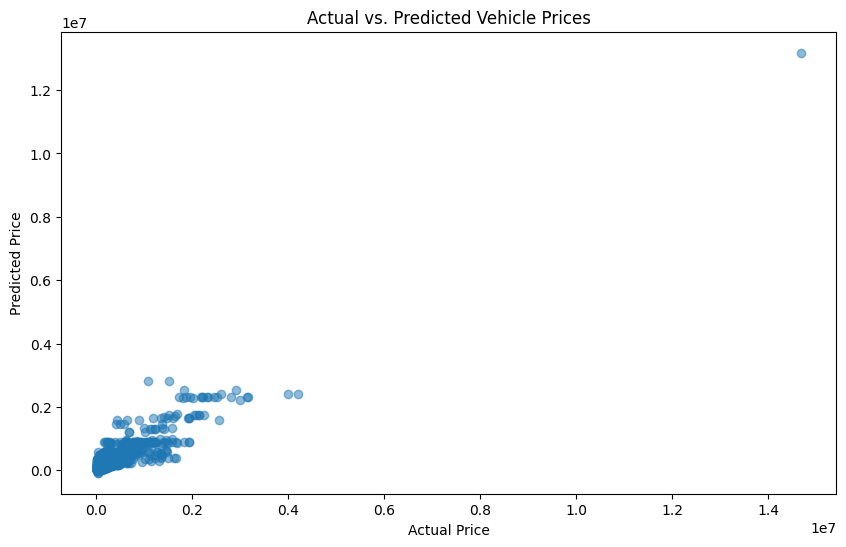

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Vehicle Prices")
plt.show()